##              Real-World Pedal Energy Harvesting 


###        PROBLEM STATEMENT

Estimate the total energy that can be harvested from human footsteps in crowded areas (e.g., metro stations, malls, universities) and assess its contribution toward sustainable smart-city energy solutions.

### Importing Required Libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import os
import datetime as dt

### Dataset Overview

#### Dataset Details -1
* **Dataset Name** :**Footstep Power Generation Tile Data**
* **Source** : https://www.kaggle.com/datasets/ishanshrivastava28/footstep-power-generation-tile-data
* **File Format** : .csv

#### Dataset Description
The Footstep Power Generation Tile data contains 3 numerical features voltage(V),current(mA),and weight(kgs).1 categorical feature that is the step location of the person on the square tile-center,edge,corner.It also contains the null values,Null values are occurred due to loose connections of sensors.

#### Feature Description
* **Time_sec**:The Timestamp since the start of the measurement
* **Pedal_RPM**:Revolution per minute of the Pedal
* **Torque_Nm**:Mechanical torque applied to the Pedal
* **Voltage_V**:Voltage generated by the pedal power generator
* **Current_A**:Electric current generated
* **Power_W**:Electrical power output of the system



#### Loading the Dataset

In [5]:
powergenerated=pd.read_csv('power_tile_data (1).csv')

#### Explore and Understand the Data

In [6]:
powergenerated.head(10)

,voltage,current,weight,step_location,Power
0,7.52,50.89,53,Center,0.38
1,16.10,51.45,59,Edge,0.83
2,21.70,54.90,63,Center,1.19
3,6.05,52.86,54,Edge,0.32
4,33.70,52.06,76,Center,1.75
5,26.39,54.59,69,Edge,1.44
6,29.80,49.55,73,Center,1.48
7,19.70,53.35,63,Center,1.05
8,26.50,48.64,72,Center,1.29
9,30.80,51.56,75,Corner,1.59


In [7]:
powergenerated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   voltage        103 non-null    float64
 1   current        103 non-null    float64
 2   weight         103 non-null    int64  
 3   step_location  103 non-null    object 
 4   Power          103 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 4.2+ KB


In [8]:
powergenerated.describe()

,voltage,current,weight,Power
count,103.000000,103.000000,103.000000,103.000000
mean,19.317961,47.804175,65.504854,0.972233
std,10.983493,11.163231,8.523179,0.562046
min,0.000000,0.000000,50.000000,0.000000
25%,10.650000,47.590000,59.500000,0.520000
50%,19.700000,49.920000,65.000000,1.000000
75%,26.345000,52.435000,71.000000,1.305000
max,53.700000,54.930000,89.000000,2.950000


In [9]:
powergenerated.isnull()

,voltage,current,weight,step_location,Power
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
98,False,False,False,False,False
99,False,False,False,False,False
100,False,False,False,False,False
101,False,False,False,False,False


In [10]:
powergenerated.sum()

voltage                                                    1989.75
current                                                    4923.83
weight                                                        6747
step_location    CenterEdgeCenterEdgeCenterEdgeCenterCenterCent...
Power                                                       100.14
dtype: object

In [11]:
powergenerated.isnull().sum()

voltage          0
current          0
weight           0
step_location    0
Power            0
dtype: int64

In [12]:
null_power = powergenerated[powergenerated['voltage']==0]
null_power

,voltage,current,weight,step_location,Power
15,0.0,0.0,53,Center,0.0
33,0.0,0.0,77,Edge,0.0
51,0.0,0.0,80,Edge,0.0
62,0.0,0.0,73,Center,0.0
79,0.0,0.0,66,Center,0.0


In [13]:
final_df = powergenerated[powergenerated['voltage']!=0]
final_df

,voltage,current,weight,step_location,Power
0,7.52,50.89,53,Center,0.38
1,16.10,51.45,59,Edge,0.83
2,21.70,54.90,63,Center,1.19
3,6.05,52.86,54,Edge,0.32
4,33.70,52.06,76,Center,1.75
...,...,...,...,...,...
98,19.60,49.06,61,Center,0.96
99,29.40,46.68,72,Center,1.37
100,19.40,47.74,65,Center,0.93
101,9.90,47.17,57,Center,0.47


<Axes: xlabel='voltage', ylabel='Power'>

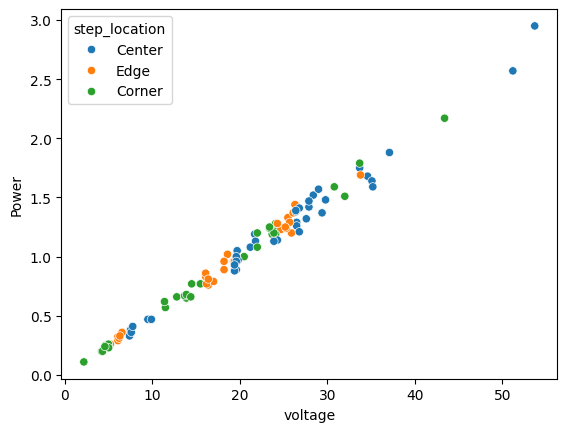

In [14]:
sns.scatterplot(data=final_df, x="voltage", y="Power", hue = 'step_location')

<Axes: xlabel='Power', ylabel='current'>

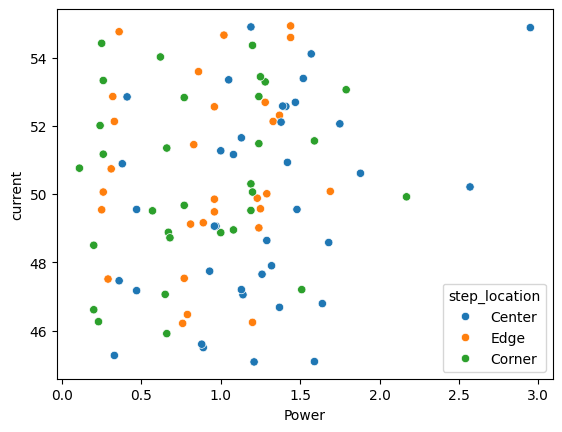

In [15]:
sns.scatterplot(data=final_df, x="Power", y="current" ,hue = 'step_location' )

In [16]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [17]:
final_df['step_location']= labelencoder.fit_transform(final_df['step_location'])

C:\Users\jwali\AppData\Local\Temp\ipykernel_9904\881718845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['step_location']= labelencoder.fit_transform(final_df['step_location'])


In [18]:
final_df.head()

,voltage,current,weight,step_location,Power
0,7.52,50.89,53,0,0.38
1,16.10,51.45,59,2,0.83
2,21.70,54.90,63,0,1.19
3,6.05,52.86,54,2,0.32
4,33.70,52.06,76,0,1.75


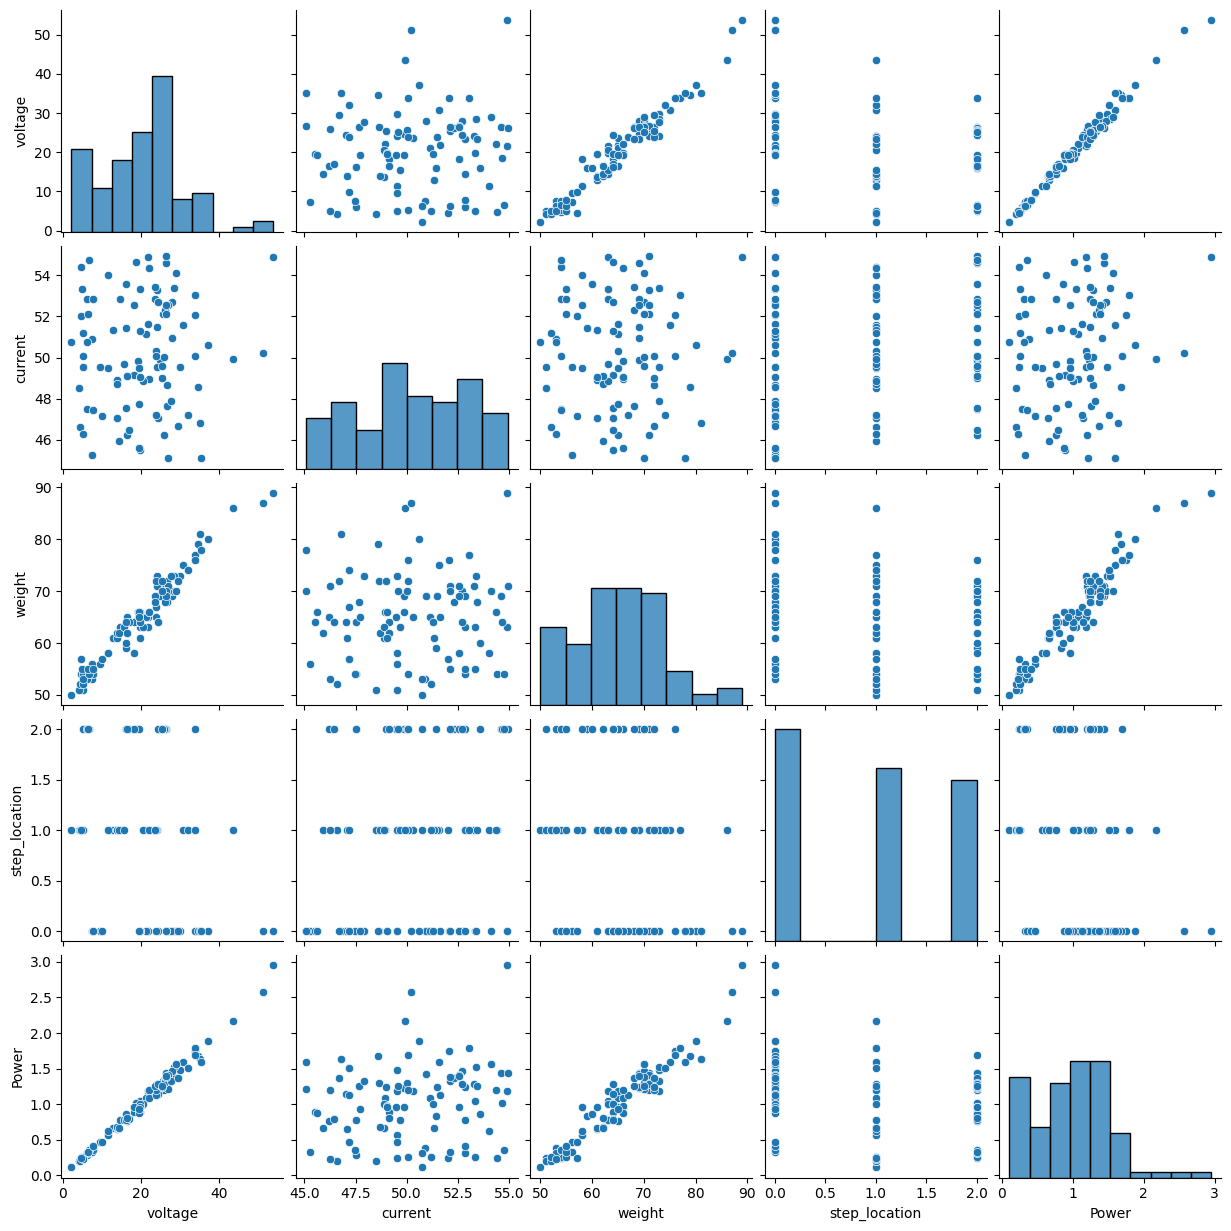

In [19]:
sns.pairplot(final_df)

#### Feature Selection

In [20]:
X = final_df.iloc[:,0:4]
Y = final_df.iloc[:,-1]

#### Data Splitting
Data Splitting for the Training and Testing Purpose.

In [21]:
print(X.head())

   voltage  current  weight  step_location
0     7.52    50.89      53              0
1    16.10    51.45      59              2
2    21.70    54.90      63              0
3     6.05    52.86      54              2
4    33.70    52.06      76              0


In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

#### Model Selection and Model Building

### LinearRegression
Here we are applying the Linear Regression Model. The important key notes for using Linear Regression is as follows. Simplicity & Interpretability,
Fast Computation, Captures Linear Relationships and It's a Baseline Model.

In [23]:
model = LinearRegression()
model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
Y_pred = model.predict(X_test)


In [25]:
Y_pred

array([0.89122127, 0.17206951, 0.64827083, 0.95924297, 1.42643744,
       1.38219866, 1.19554263, 0.56059765, 1.23061836, 0.24244346,
       1.27242586, 0.80008327, 1.24417366, 1.13026794, 0.39125459,
       1.88007086, 0.35158914, 1.46091017, 1.24434029, 1.69532162])

#### Applying Evaluation Metrics to check model's performance

In [26]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 0.0004312683494989049
R² Score: 0.9980446022572881


#### Visualize Predictions

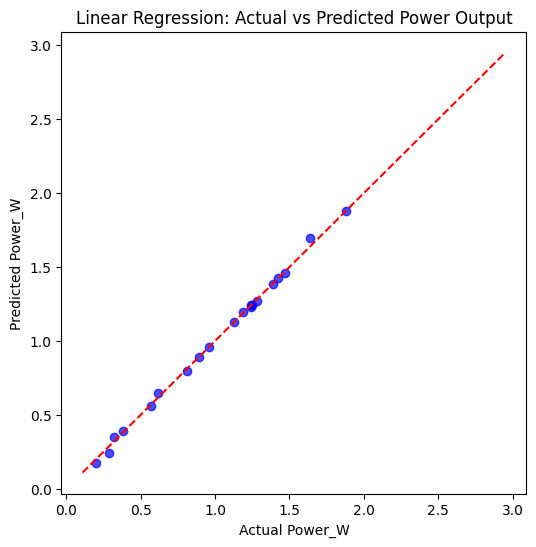

In [30]:
plt.figure(figsize=(6,6))
plt.scatter(Y_test, Y_pred, alpha=0.7, color="blue")
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], "r--")  
plt.xlabel("Actual Power_W")
plt.ylabel("Predicted Power_W")
plt.title("Linear Regression: Actual vs Predicted Power Output")
plt.show()


### RandomForestRegressor
Here we are applying the RandomForestRegression Model. The important key notes for using RandomForestRegression is as follows. Handles non-linearity, more accurate, less sensitive to noise.

In [31]:
model = RandomForestRegressor()
model.fit(X_train, Y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
Y_pred = model.predict(X_test)

In [33]:
Y_pred

array([0.9612, 0.2269, 0.5589, 0.9567, 1.3623, 1.3965, 1.1766, 0.5659,
       1.25  , 0.3148, 1.2652, 0.7731, 1.239 , 1.1333, 0.3577, 1.6706,
       0.323 , 1.4205, 1.2422, 1.6341])

#### Applying Evaluation Metrics to check model's performance

In [34]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 0.003115659499999957
R² Score: 0.9858734044349936


#### Visualize Predictions

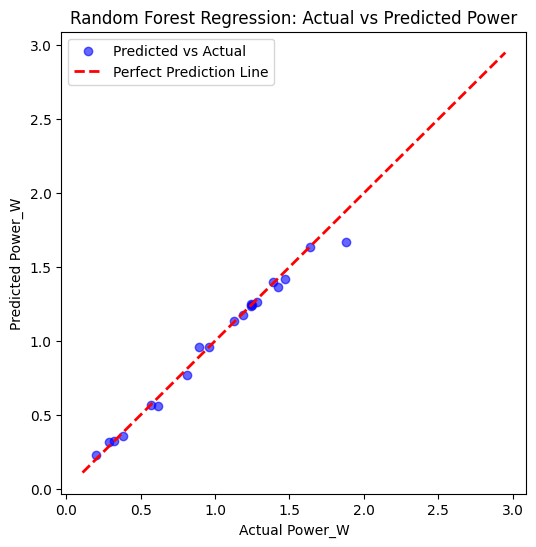

In [35]:
plt.figure(figsize=(6,6))
plt.scatter(Y_test,Y_pred, color="blue", alpha=0.6, label="Predicted vs Actual")
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], "r--", lw=2, label="Perfect Prediction Line")
plt.xlabel("Actual Power_W")
plt.ylabel("Predicted Power_W")
plt.title("Random Forest Regression: Actual vs Predicted Power")
plt.legend()
plt.show()

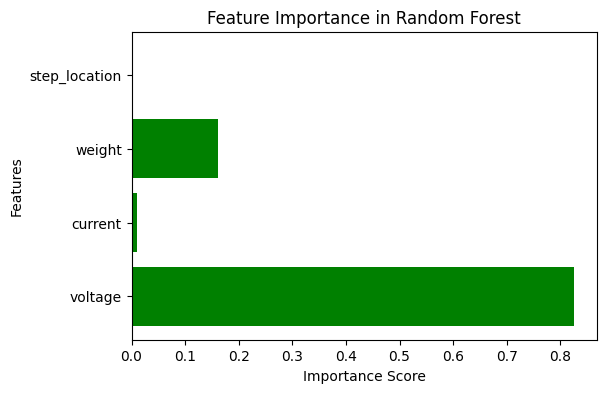

In [36]:
importances = model.feature_importances_
features = X.columns  

plt.figure(figsize=(6,4))
plt.barh(features, importances, color="green")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()

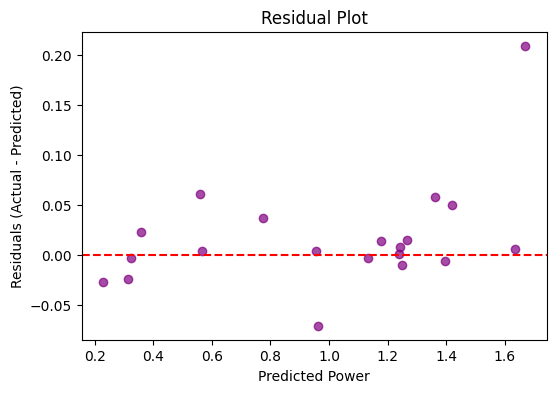

In [37]:
residuals = Y_test - Y_pred

plt.figure(figsize=(6,4))
plt.scatter(Y_pred, residuals, alpha=0.7, color="purple")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Power")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()

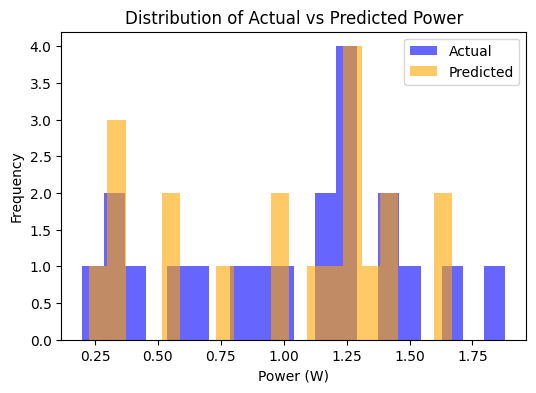

In [38]:
plt.figure(figsize=(6,4))
plt.hist(Y_test, bins=20, alpha=0.6, label="Actual", color="blue")
plt.hist(Y_pred, bins=20, alpha=0.6, label="Predicted", color="orange")
plt.legend()
plt.title("Distribution of Actual vs Predicted Power")
plt.xlabel("Power (W)")
plt.ylabel("Frequency")
plt.show()

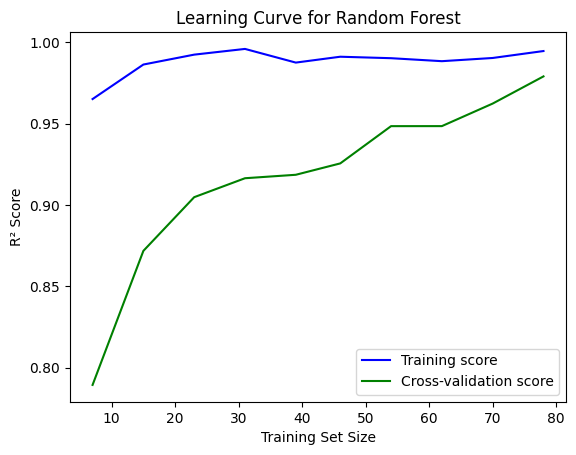

In [39]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    model, X, Y, cv=5, scoring='r2', n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Training score", color="blue")
plt.plot(train_sizes, test_mean, label="Cross-validation score", color="green")
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.title("Learning Curve for Random Forest")
plt.legend()
plt.show()


### Compare of the Models
By the Visualization I Predict that the RandomForestRegression is the Perfect for the dataset. We Initially applied Linear Regression (LR) as a baseline model because of its simplicity and interpretability. Linear Regression assumes a straight-line relationship between features (Pedal RPM, Torque, Voltage, Current) and the target (Power_W).

After  We Implementing the RandomForestRegression we can combine the multiple decision trees.Random Forest achieved a higher R² score and lower Mean Squared Error (MSE), proving to be more accurate for predicting pedal-powered electricity generation.

#### Making Predictions for the User's Input

In [40]:
import joblib
joblib.dump(model, "footstep_model.pkl")
joblib.dump(labelencoder, "label_encoder.pkl")


['label_encoder.pkl']

In [9]:
import pandas as pd
import joblib

# Load trained model & encoder
model = joblib.load("footstep_model.pkl")
le = joblib.load("label_encoder.pkl")

# --- Taking User Inputs ---
voltage = float(input("Enter Voltage (V): "))
current = float(input("Enter Current (A): "))
weight = float(input("Enter Weight (kg): "))
step_location_str = input("Enter Step Location: ")

# Handle unseen labels safely
if step_location_str not in le.classes_:
    print(f"⚠️ '{step_location_str}' not seen during training. Using default = {le.classes_[0]}")
    step_location_encoded = le.transform([le.classes_[0]])[0]
else:
    step_location_encoded = le.transform([step_location_str])[0]

# --- Creating Input Data Frame ---
input_df = pd.DataFrame([[voltage, current, weight, step_location_encoded]],
                        columns=['voltage','current','weight','step_location'])

# --- Making Prediction ---
predicted_power = model.predict(input_df)

# --- Printing Result ---
print(f"\n⚡ Predicted Power Output: {predicted_power[0]:.4f} Watts")



⚡ Predicted Power Output: 2.0427 Watts
